# Redes Convolucionais

https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8

Geralmente trabalha-se com imagens.

Uma Imagem colorida (RGB) 700x700 px contém 700 x 700 x 3 = 1_470_000 inputs

### Filtro e Convolução

Filtro multiplica element-wise e soma os elementos (convolução)

Padding mantém as dimensões originais

Para uma imagem RGB, o filtro faz a convolução em cada um dos três canais e soma as três matrizes.

obs.: Os números da matriz de convolução (filtros) são feitos com valores aleatórios e readequados com o backpropagation, obtendo neurônios com com dados diferentes (Conv2D())

### Pooling: 

https://www.deeplearningbook.com.br/camadas-de-pooling-em-redes-neurais-convolucionais/

Reduzir o input para favorecer o processamento

Max Pooling: Representa os pixels mais fortes da imagem original

----

In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from sklearn.preprocessing import OneHotEncoder

In [14]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [16]:
# Coloca mais uma dimensão, caso a imagem esteja em grayscale
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)


In [18]:
# Normalização
x_train = x_train/255
x_test = x_test/255

In [19]:
# One Hot Encoder
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [20]:
# Particionamento
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape

((48000, 28, 28, 1),
 (12000, 28, 28, 1),
 (10000, 28, 28, 1),
 (48000, 10),
 (12000, 10),
 (10000, 10))

In [21]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# Arquitetura da rede
rede_simples = Sequential()
rede_simples.add(Conv2D(25, (5,5), activation = 'relu', input_shape = (28,28,1))) 
# 25 neurônios, filtros 5x5 (não se sabe os parâmetros desses filtros), ativação relu, input_shape precisa ter 3 dimensões
rede_simples.add(MaxPooling2D())
rede_simples.add(Conv2D(25, (5,5), activation = 'relu'))
rede_simples.add(MaxPooling2D())
rede_simples.add(Flatten())
rede_simples.add(Dense(10, activation = 'softmax'))

In [23]:
rede_simples.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 25)        650       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 25)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 25)          15650     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 25)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [28]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [29]:
# Treinamento
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 20, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 24s 15ms/step - loss: 0.1987 - accuracy: 0.9426 - val_loss: 0.0846 - val_accuracy: 0.9747
Epoch 2/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.0589 - val_accuracy: 0.9808
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.0486 - val_accuracy: 0.9854
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0435 - val_accuracy: 0.9862
Epoch 5/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0426 - val_accuracy: 0.9869
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0432 - val_accuracy: 0.9870
Epoch 7/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0449 -

In [30]:
# Avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 5s 4ms/step


0.9896

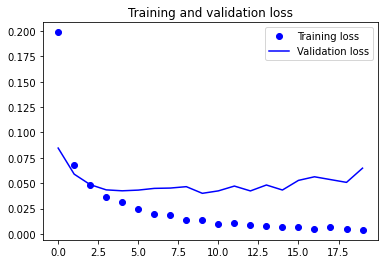

In [31]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
# Com regularização
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=32,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0575 - val_accuracy: 0.9885
Epoch 2/150
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0583 - val_accuracy: 0.9900
Epoch 3/150
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0530 - val_accuracy: 0.9897
Epoch 4/150
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0575 - val_accuracy: 0.9885
Epoch 5/150
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0550 - val_accuracy: 0.9904
Epoch 6/150
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0592 - val_accuracy: 0.9891
Epoch 7/150
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0

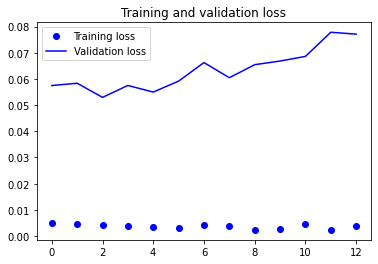

In [33]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()